# Shapes counting


## Task
**Geometic shapes counting**: network outputs $10$ probabilities for each class, representing different numbers of objects of this class on the image. So the network should have $60$ outputs. Outputs $0..9$ should sum up to $100\%$, so outputs $10..19$, and so on. The loss function for the network is the sum of squared counting errors:
$$J = \sum_{i=0}^5 \sum_{j=0}^9\hat y_j^i (j - r^i)^2$$ *Notation:* $r^i$ is a ground truth, $\hat y_j^i$ is predicted probability of $j$ figures of class $i$ on the image.

## Network

At first I tried to use the same model that for the [classification task](classification.ipynb).
But it didn't even achieve any sensible loss, so I decided to make a larger model.

In [ ]:
class ShapesCounter(nn.Module):
    def __init__(self):
        super(ShapesCounter, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=4,
                      kernel_size=(2, 2),
                      padding=(1, 1)),
            nn.BatchNorm2d(4),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=4,
                      out_channels=16,
                      kernel_size=(3, 3),
                      padding=(1, 1)),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=32,
                      kernel_size=(4, 4),
                      padding=(1, 1)),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32,
                      out_channels=64,
                      kernel_size=(5, 5),
                      padding=(1, 1)),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=(6, 6),
                      stride=(2, 2),
                      padding=(1, 1)),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=(7, 7),
                      padding=(1, 1)),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.conv7 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=(8, 8)),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )

        self.fc1 = nn.Sequential(
            nn.Linear(512, 256),
        )



    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)

        x = x.view(x.shape[0], -1)

        x = self.fc1(x)

        x = x.view(x.shape[0], 6, 10)

        return x

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_training(run_hist):
    """Plot the training history of the classification model."""
    fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
    x = np.arange(len(run_hist["train/loss"])) + 1
    ax[0].plot(x, run_hist["train/loss"], 'b', marker='.', label="epoch train loss")
    ax[0].plot(x, run_hist["validation/loss"], 'r', marker='.', label="epoch test loss")
    ax[0].legend()
    ax[1].plot(x, run_hist["train/acc"], 'b', marker='.', label="epoch train accuracy")
    ax[1].plot(x, run_hist["validation/acc"], 'r', marker='.', label="epoch test accuracy")
    ax[1].legend()

    fig, ax = plt.subplots(1, 1, figsize=(20, 6), sharex=True)
    x = np.arange(len(run_hist["train/batch_loss"])) + 1
    ax.plot(x, run_hist["train/batch_loss"], 'b', marker='.', label="batch train loss")
    ax.legend()

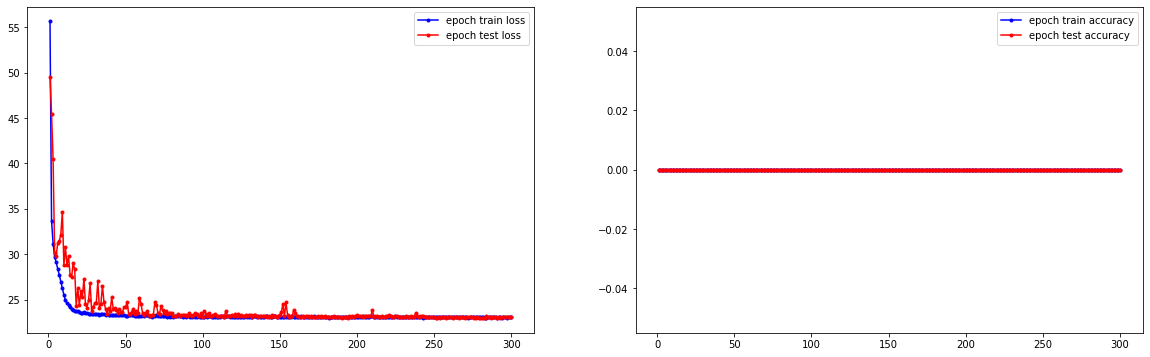

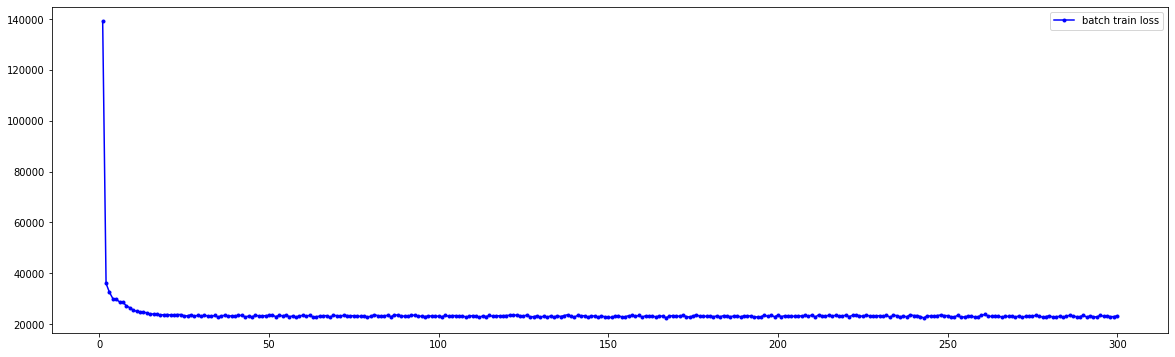

In [2]:
with open('charts/counter/basic.json', 'r') as f:
    hist = json.loads(f.read())
    plot_training(hist)

We can see on the chart that it didn't went good. The loss is decreasing but accuracy is still 0.
Probably our net is still too small and it can't learn more complex relations.
Before we try adding more layers let's try the `BatchNorm` trick from classification.

## Batch Normalization after last layer

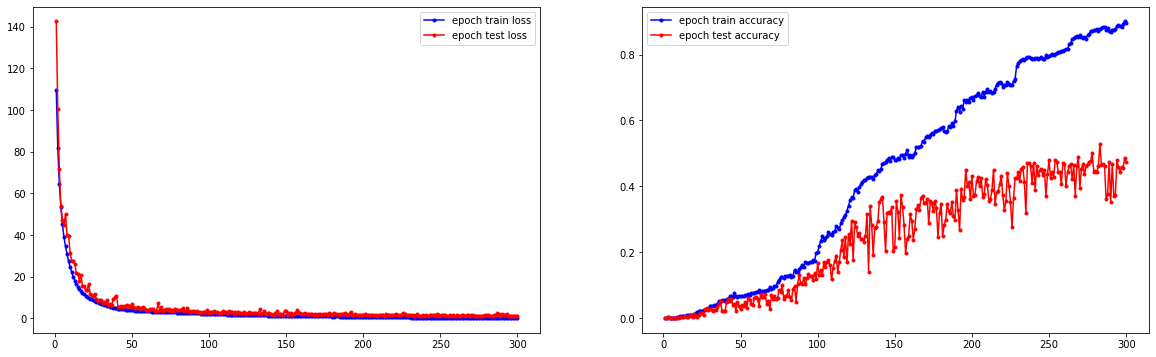

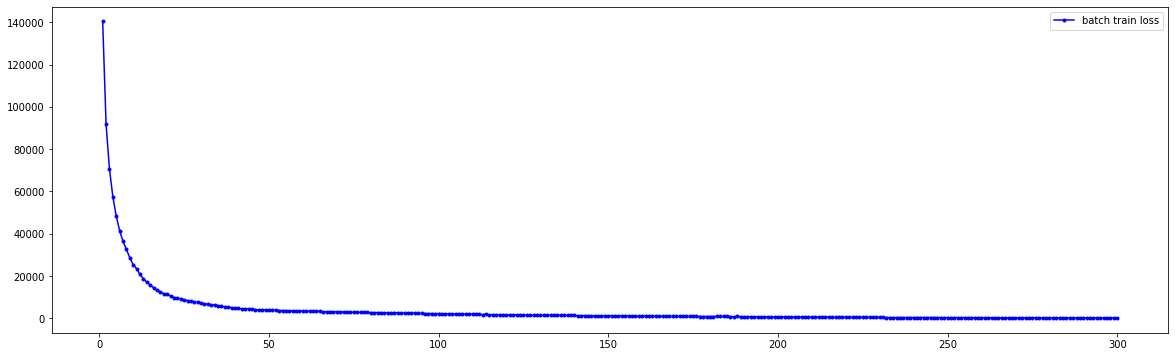

In [3]:
with open('charts/counter/batch_norm_last.json', 'r') as f:
    hist = json.loads(f.read())
    plot_training(hist)

The accuracy went up to 45%! It's a great result, but maybe we can improve it.

## More linear layers

Same network with 2 linear layers. `512 -> 256 -> 60`

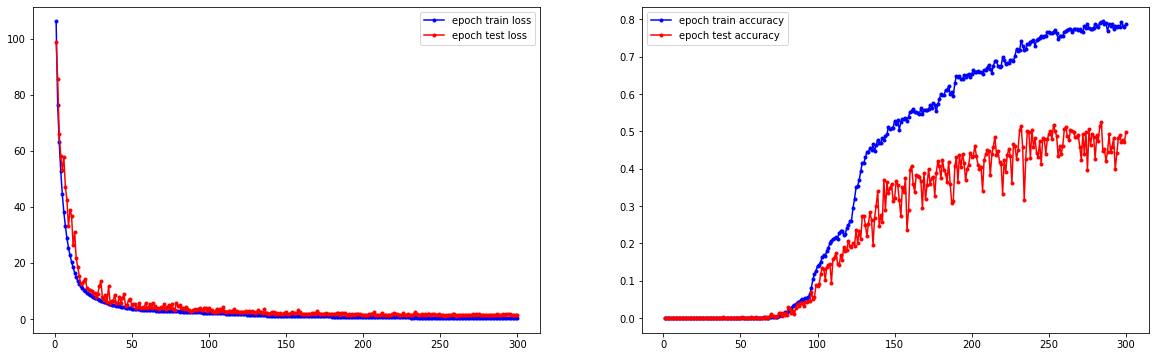

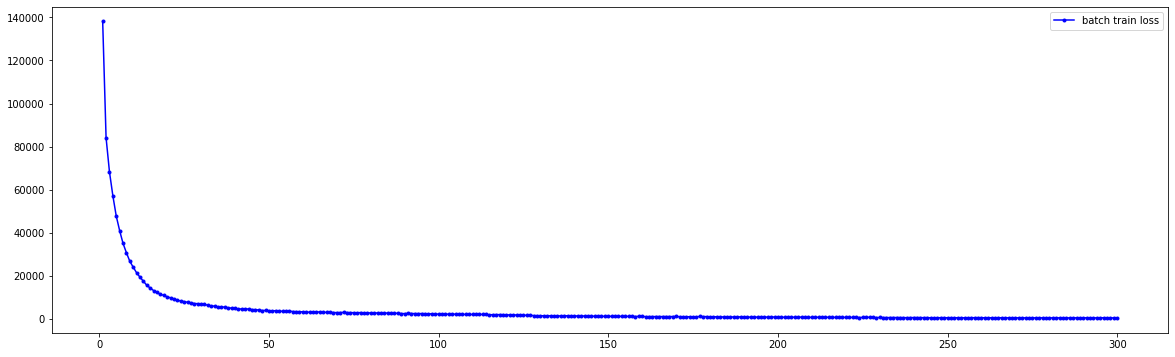

In [5]:
with open('charts/counter/new_layer.json', 'r') as f:
    hist = json.loads(f.read())
    plot_training(hist)

The results are slightly better, but the network is overfitting more then the one before.

## 3 linear layers

I added one more layer out of curiosity `512 -> 256 -> 256 -> 60`

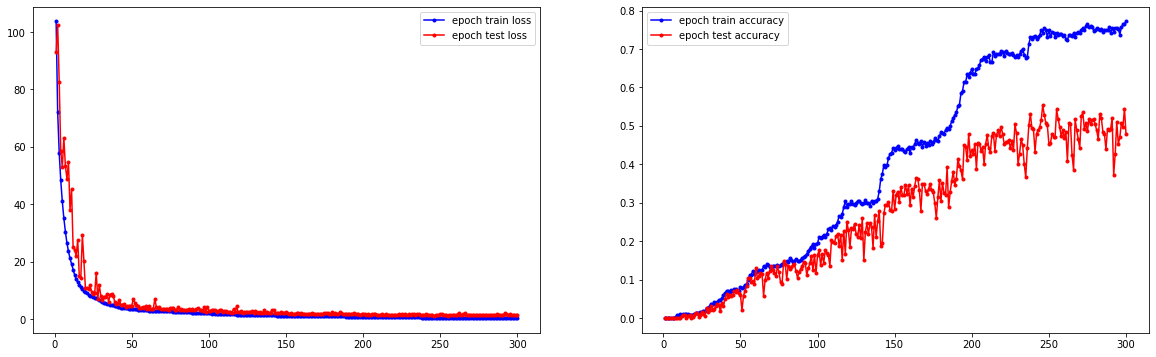

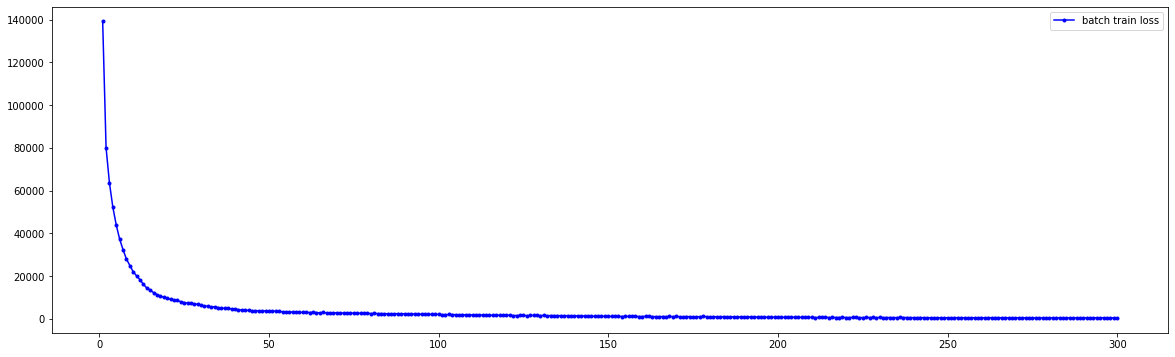

In [6]:
with open('charts/counter/3_layers.json', 'r') as f:
    hist = json.loads(f.read())
    plot_training(hist)cd

## Network with 135 outputs

This network has 135 outputs, because that's the different results of counting figures (${6 \choose 2}9=135$).
We transformed this into classification task so I used `nn.CrossEntropyLoss()` as a loss function.

In [ ]:
class ShapesCounter135(nn.Module):

    def __init__(self):
        super(ShapesCounter135, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=4,
                      kernel_size=(2, 2),
                      padding=(1, 1)),
            nn.BatchNorm2d(4),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=4,
                      out_channels=16,
                      kernel_size=(3, 3),
                      padding=(1, 1)),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=32,
                      kernel_size=(4, 4),
                      padding=(1, 1)),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32,
                      out_channels=64,
                      kernel_size=(5, 5),
                      padding=(1, 1)),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=(6, 6),
                      stride=(2, 2),
                      padding=(1, 1)),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=(7, 7),
                      padding=(1, 1)),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.conv7 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=(8, 8)),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )

        self.fc1 = nn.Sequential(
            nn.Linear(512, 135),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)

        x = x.view(x.shape[0], -1)

        x = self.fc1(x)

        return x

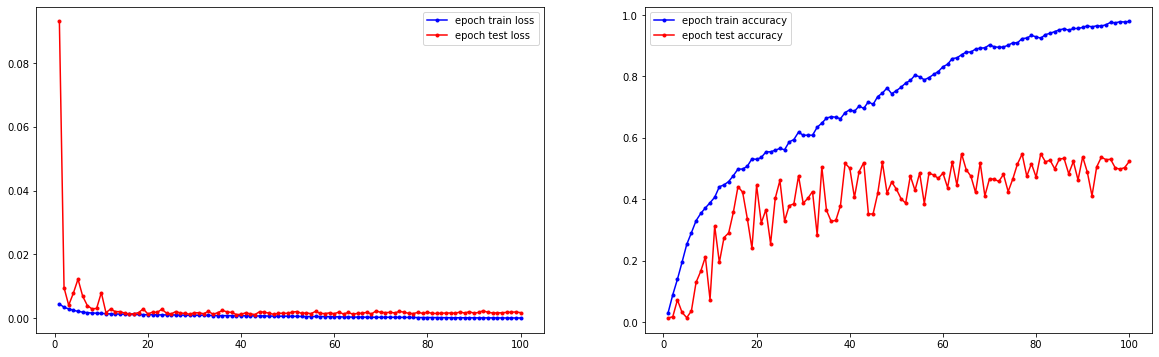

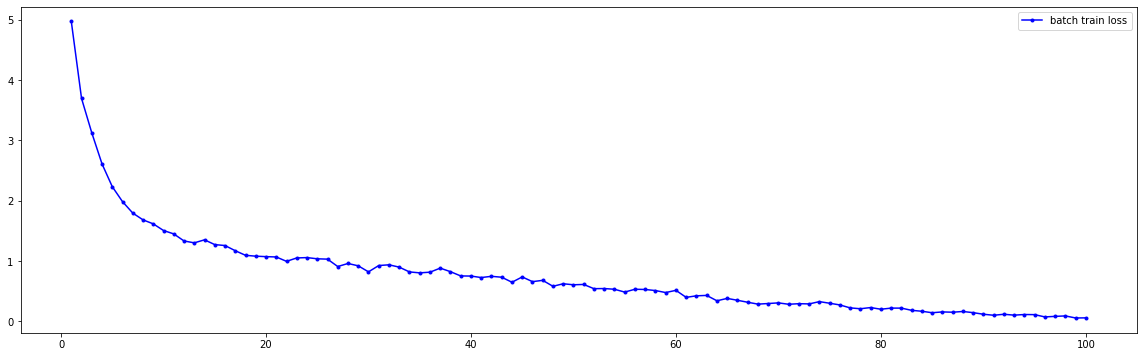

In [9]:
with open('charts/counter/135_output.json', 'r') as f:
    hist = json.loads(f.read())
    plot_training(hist)

Model is overfitting, while loss is nearly at zero.

## Batch normalization after last layer

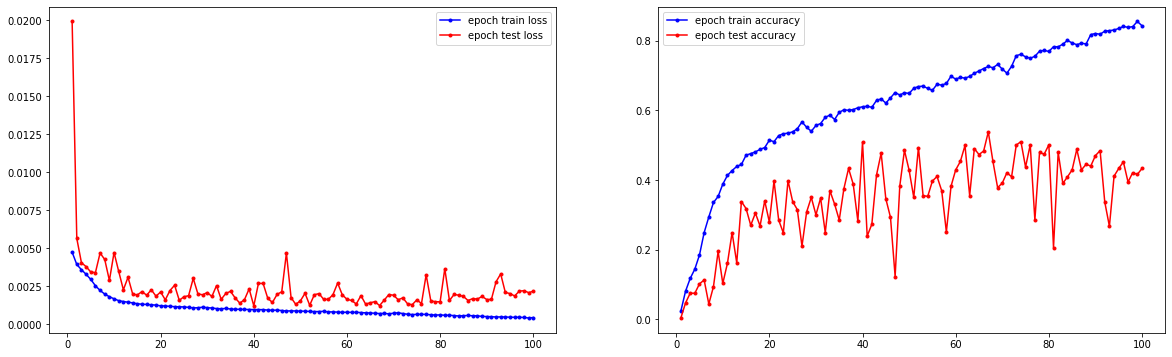

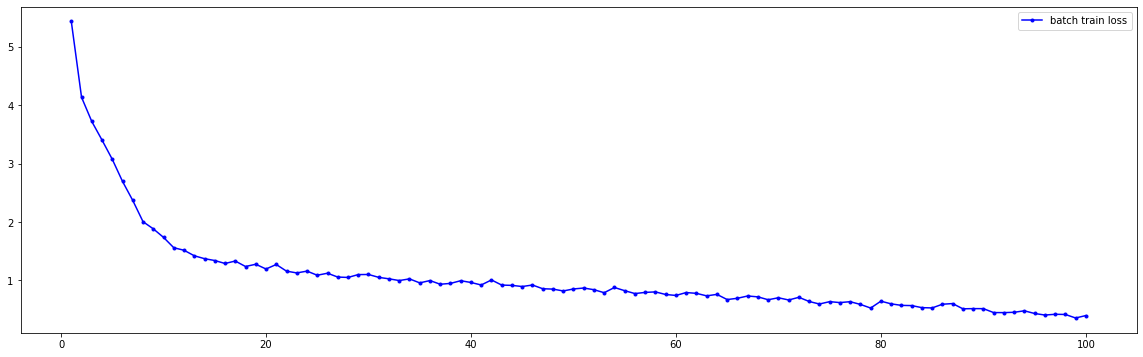

In [12]:
with open('charts/counter/135_batch_norm.json', 'r') as f:
    hist = json.loads(f.read())
    plot_training(hist)

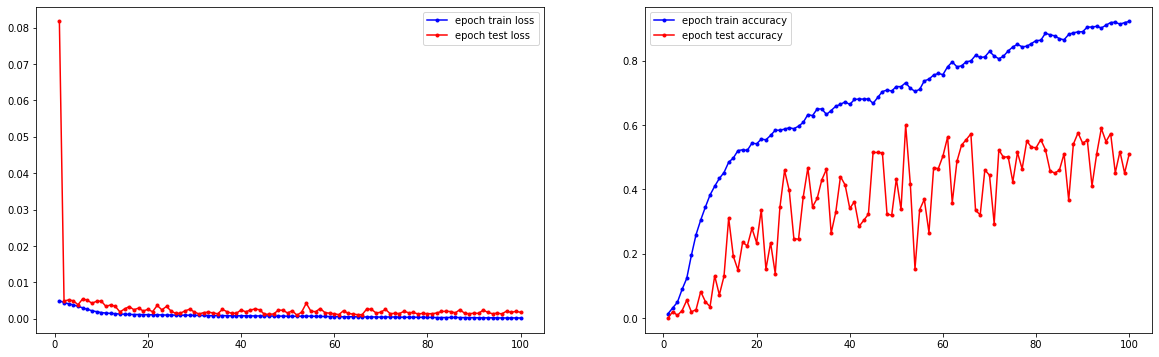

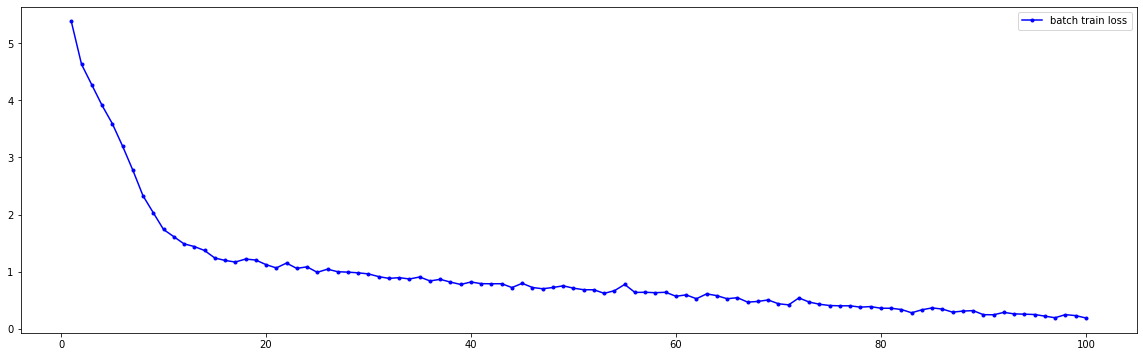

In [13]:
with open('charts/counter/135_batch_norm_larger.json', 'r') as f:
    hist = json.loads(f.read())
    plot_training(hist)

The last model appears to give the best result of **51.1%**. Both models (output 60 or 135) can be found [here](models/shapes_counter.py).